## **2.1 Images**

In [10]:
import torchvision.datasets as datasets
import matplotlib.pyplot as plt 
import torch

##### Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).

In [11]:
mnist_dataset = datasets.MNIST(root='./data', download=True, transform=None)
mnist_subset = torch.utils.data.Subset(mnist_dataset,range(1000))
mnist_dataset = mnist_dataset._load_data()
#print(type(mnist_subset))

##### Plot a histogram of classes in your subset of MNIST.

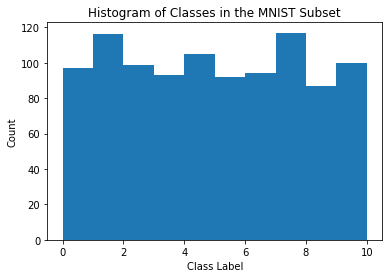

In [12]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.hist(labels, bins=range(11))
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Histogram of Classes in the MNIST Subset')
plt.show()

##### Use the einops python package to ’batch’ the subset of MNIST images. Each batch should contain 25 different samples. Hint: The subset of MNIST image data should change dimensions from [1000, 28, 28] → [Number of Batches, Batch Size, 1, 28, 28] 
##### Context: Deep learning models operate over batches of samples. This rapidly speeds up computation as the forward pass runs parallel across the batch dimension.Batching also can improve optimization and provides the S in SGD (Stochastic Gradient Descent). Additionally, neural networks expect a channel dimension for image data. MNIST is grayscale so it only contains one channel, but other images can contain color, in which case they will have three channels, RGB.

##### Randomly select an MNIST image sample and, using matplotlib, plot it in three dimensions. The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity.

## 2.2 Time Series

##### Task: Load the data (energydata complete.csv) and perform the following analysis.

In [13]:
import pandas as pd 
data = pd.read_cvs('energydata_complete.cvs')
data
print(type(data))

AttributeError: module 'pandas' has no attribute 'read_cvs'

##### Plot the appliances energy consumption for whole period and a closer look at anyone week of consumption.

##### Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.